In [ ]:

import pandas as pd



In [2]:
data1 = pd.read_csv("crime/42_District_wise_crimes_committed_against_women_2001_2012.csv")
data1.columns

Index(['STATE/UT', 'DISTRICT', 'Year', 'Rape', 'Kidnapping and Abduction',
       'Dowry Deaths', 'Assault on women with intent to outrage her modesty',
       'Insult to modesty of Women', 'Cruelty by Husband or his Relatives',
       'Importation of Girls'],
      dtype='object')

In [3]:
data2 = pd.read_csv("crime/42_District_wise_crimes_committed_against_women_2013.csv")
data2.columns

Index(['STATE/UT', 'DISTRICT', 'Year', 'Rape', 'Kidnapping and Abduction',
       'Dowry Deaths', 'Assault on women with intent to outrage her modesty',
       'Insult to modesty of Women', 'Cruelty by Husband or his Relatives',
       'Importation of Girls'],
      dtype='object')

In [4]:
data3 = pd.read_csv("crime/42_District_wise_crimes_committed_against_women_2014.csv")
# data3.columns 

In [5]:
data3.rename(columns={
    'States/UTs': 'STATE/UT',
    'District': 'DISTRICT',
    'Kidnapping & Abduction_Total': 'Kidnapping and Abduction',
    'Dowry Deaths': 'Dowry Deaths',
    'Assault on Women with intent to outrage her Modesty_Total': 'Assault on women with intent to outrage her modesty',
    'Insult to the Modesty of Women_Total': 'Insult to modesty of Women',
    'Cruelty by Husband or his Relatives': 'Cruelty by Husband or his Relatives',
    'Importation of Girls from Foreign Country': 'Importation of Girls',
}, inplace=True)


In [6]:
columns_to_keep = [
    'STATE/UT', 'DISTRICT', 'Year', 'Rape', 'Kidnapping and Abduction',
    'Dowry Deaths', 'Assault on women with intent to outrage her modesty',
    'Insult to modesty of Women', 'Cruelty by Husband or his Relatives',
    'Importation of Girls'
]

data3_trimmed = data3[columns_to_keep].copy()


In [7]:
state_name_corrections = {
    # Union Territories
    'A & N ISLANDS': 'Andaman & Nicobar Islands',
    'A&N ISLANDS': 'Andaman & Nicobar Islands',
    'D & N HAVELI': 'Dadra & Nagar Haveli',
    'D&N HAVELI': 'Dadra & Nagar Haveli',
    'DAMAN & DIU': 'Daman & Diu',
    'DELHI UT': 'Delhi',
    'LAKSHADWEEP': 'Lakshadweep',
    'PUDUCHERRY': 'Puducherry',
    'CHANDIGARH': 'Chandigarh',

    # States - case normalization
    'ANDHRA PRADESH': 'Andhra Pradesh',
    'ARUNACHAL PRADESH': 'Arunachal Pradesh',
    'ASSAM': 'Assam',
    'BIHAR': 'Bihar',
    'CHHATTISGARH': 'Chhattisgarh',
    'GOA': 'Goa',
    'GUJARAT': 'Gujarat',
    'HARYANA': 'Haryana',
    'HIMACHAL PRADESH': 'Himachal Pradesh',
    'JAMMU & KASHMIR': 'Jammu & Kashmir',
    'JHARKHAND': 'Jharkhand',
    'KARNATAKA': 'Karnataka',
    'KERALA': 'Kerala',
    'MADHYA PRADESH': 'Madhya Pradesh',
    'MAHARASHTRA': 'Maharashtra',
    'MANIPUR': 'Manipur',
    'MEGHALAYA': 'Meghalaya',
    'MIZORAM': 'Mizoram',
    'NAGALAND': 'Nagaland',
    'ODISHA': 'Odisha',
    'PUNJAB': 'Punjab',
    'RAJASTHAN': 'Rajasthan',
    'SIKKIM': 'Sikkim',
    'TAMIL NADU': 'Tamil Nadu',
    'TRIPURA': 'Tripura',
    'UTTAR PRADESH': 'Uttar Pradesh',
    'UTTARAKHAND': 'Uttarakhand',
    'WEST BENGAL': 'West Bengal',
    'TELANGANA': 'Telangana',

    # Redundant lowercase entries
    'Andhra Pradesh': 'Andhra Pradesh',
    'Arunachal Pradesh': 'Arunachal Pradesh',
    'Assam': 'Assam',
    'Bihar': 'Bihar',
    'Chhattisgarh': 'Chhattisgarh',
    'Goa': 'Goa',
    'Gujarat': 'Gujarat',
    'Haryana': 'Haryana',
    'Himachal Pradesh': 'Himachal Pradesh',
    'Jammu & Kashmir': 'Jammu & Kashmir',
    'Jharkhand': 'Jharkhand',
    'Karnataka': 'Karnataka',
    'Kerala': 'Kerala',
    'Madhya Pradesh': 'Madhya Pradesh',
    'Maharashtra': 'Maharashtra',
    'Manipur': 'Manipur',
    'Meghalaya': 'Meghalaya',
    'Mizoram': 'Mizoram',
    'Nagaland': 'Nagaland',
    'Odisha': 'Odisha',
    'Punjab': 'Punjab',
    'Rajasthan': 'Rajasthan',
    'Sikkim': 'Sikkim',
    'Tamil Nadu': 'Tamil Nadu',
    'Tripura': 'Tripura',
    'Uttar Pradesh': 'Uttar Pradesh',
    'Uttarakhand': 'Uttarakhand',
    'West Bengal': 'West Bengal',
    'A&N Islands': 'Andaman & Nicobar Islands',
    'Chandigarh': 'Chandigarh',
    'D&N Haveli': 'Dadra & Nagar Haveli',
    'Daman & Diu': 'Daman & Diu',
    'Delhi UT': 'Delhi',
    'Lakshadweep': 'Lakshadweep',
    'Puducherry': 'Puducherry'
}


In [8]:
# Combine data1 and data2
data_2001_2013 = pd.concat([data1, data2], ignore_index=True)

# Combine with cleaned data3
combined_women_crimes = pd.concat([data_2001_2013, data3_trimmed], ignore_index=True)


In [9]:
combined_women_crimes["STATE/UT"] = combined_women_crimes["STATE/UT"].str.strip()
combined_women_crimes["STATE/UT"] = combined_women_crimes["STATE/UT"].replace(state_name_corrections)


In [10]:
combined_women_crimes.columns

Index(['STATE/UT', 'DISTRICT', 'Year', 'Rape', 'Kidnapping and Abduction',
       'Dowry Deaths', 'Assault on women with intent to outrage her modesty',
       'Insult to modesty of Women', 'Cruelty by Husband or his Relatives',
       'Importation of Girls'],
      dtype='object')

In [11]:
combined_women_crimes["STATE/UT"].unique()

array(['Andhra Pradesh', 'Arunachal Pradesh', 'Assam', 'Bihar',
       'Chhattisgarh', 'Goa', 'Gujarat', 'Haryana', 'Himachal Pradesh',
       'Jammu & Kashmir', 'Jharkhand', 'Karnataka', 'Kerala',
       'Madhya Pradesh', 'Maharashtra', 'Manipur', 'Meghalaya', 'Mizoram',
       'Nagaland', 'Odisha', 'Punjab', 'Rajasthan', 'Sikkim',
       'Tamil Nadu', 'Tripura', 'Uttar Pradesh', 'Uttarakhand',
       'West Bengal', 'Andaman & Nicobar Islands', 'Chandigarh',
       'Dadra & Nagar Haveli', 'Daman & Diu', 'DELHI', 'Lakshadweep',
       'Puducherry', 'Delhi', 'Telangana'], dtype=object)

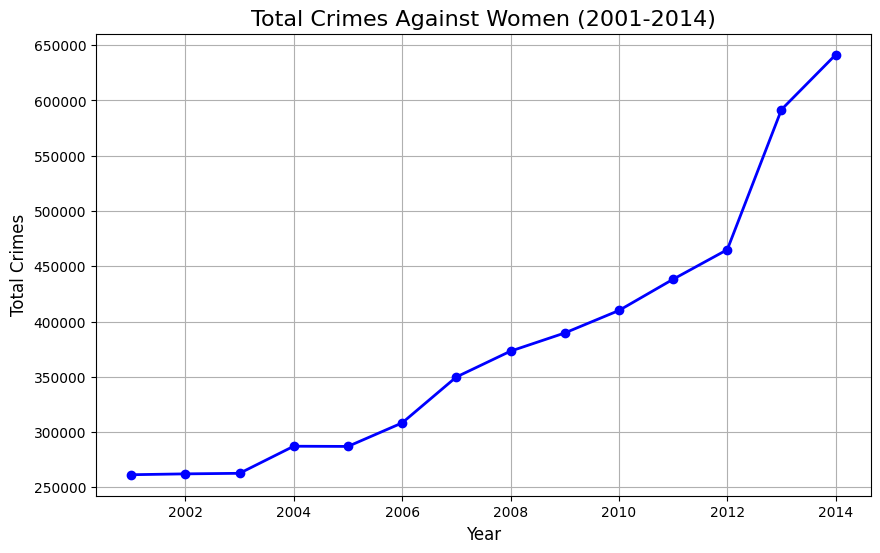

In [12]:
# Summing crimes over all states per year
combined_women_crimes['Total Crimes'] = combined_women_crimes[
    ['Rape', 'Kidnapping and Abduction', 'Dowry Deaths', 
     'Assault on women with intent to outrage her modesty', 
     'Insult to modesty of Women', 'Cruelty by Husband or his Relatives', 
     'Importation of Girls']].sum(axis=1)

# Plotting total crimes over years
import matplotlib.pyplot as plt

crime_over_time = combined_women_crimes.groupby('Year')['Total Crimes'].sum()

plt.figure(figsize=(10, 6))
crime_over_time.plot(kind='line', color='blue', marker='o', linestyle='-', linewidth=2)
plt.title("Total Crimes Against Women (2001-2014)", fontsize=16)
plt.xlabel("Year", fontsize=12)
plt.ylabel("Total Crimes", fontsize=12)
plt.grid(True)
plt.show()


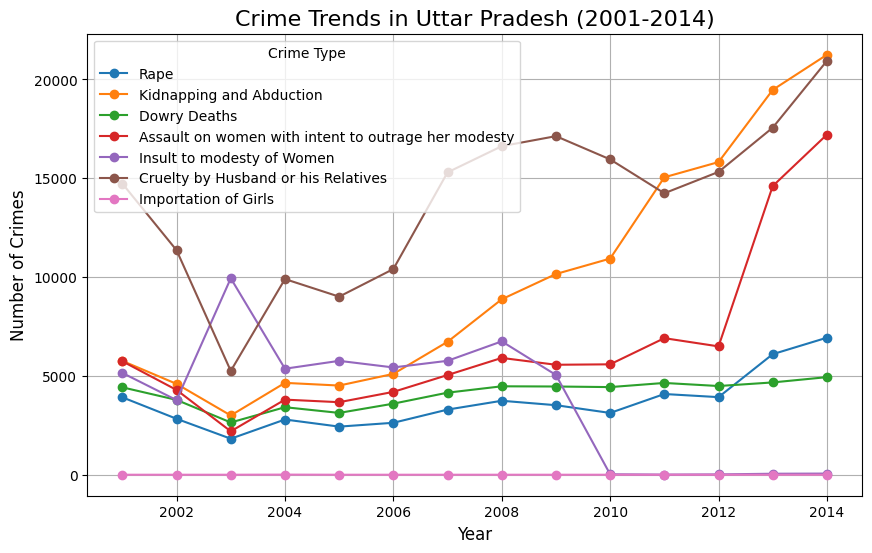

In [16]:
# Filter for a specific state (e.g., Maharashtra)
state_name = 'Uttar Pradesh'
state_data = combined_women_crimes[combined_women_crimes['STATE/UT'] == state_name]

# Group by year and sum crimes
state_trends = state_data.groupby('Year')[['Rape', 'Kidnapping and Abduction', 'Dowry Deaths', 
                                           'Assault on women with intent to outrage her modesty', 
                                           'Insult to modesty of Women', 'Cruelty by Husband or his Relatives', 
                                           'Importation of Girls']].sum()

# Plotting
state_trends.plot(kind='line', figsize=(10, 6), marker='o')
plt.title(f"Crime Trends in {state_name} (2001-2014)", fontsize=16)
plt.xlabel("Year", fontsize=12)
plt.ylabel("Number of Crimes", fontsize=12)
plt.grid(True)
plt.legend(title="Crime Type")
plt.show()
